In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from joblib import dump,load
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV, ShuffleSplit

In [33]:
#读数据标准化划分数据集
df = pd.read_csv('/Users/18014/Desktop/pybel描述符.csv')

X = df.drop(columns=['RDFT'])
Y = df['RDFT']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
print("X_train's shape is", X_train.shape,"; y_train's shape is", y_train.shape)
print("X_test's shape is", X_test.shape,"; y_test's shape is",y_test.shape)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_stand = scaler.transform(X_train)
X_test_stand = scaler.transform(X_test)

X_train's shape is (72, 55) ; y_train's shape is (72,)
X_test's shape is (18, 55) ; y_test's shape is (18,)


In [34]:
param_grid = {"hidden_layer_sizes":[(5,),(5,2)]
     ,"activation":["relu","logistic","tanh"]
     ,"learning_rate_init":[0.01,0.1]
     ,"max_iter":[100,200,500]
    }

mlpmodel = MLPRegressor()

# 使用GridSearchCV进行网格搜索
grid_search = GridSearchCV(estimator=mlpmodel, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 获取最佳模型
best_model = grid_search.best_estimator_
print("Best parameters found:", grid_search.best_params_)
####fit and predict###
mlpmodel.fit(X_train_stand, y_train)
y_train_hat = mlpmodel.predict(X_train_stand)
y_test_hat = mlpmodel.predict(X_test_stand)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.7s finished


Best parameters found: {'activation': 'tanh', 'hidden_layer_sizes': (5,), 'learning_rate_init': 0.01, 'max_iter': 500}


D:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


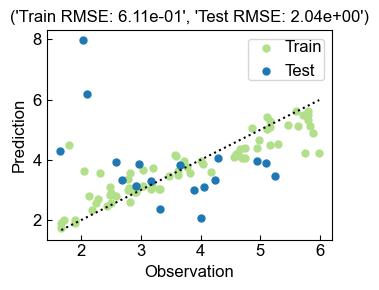

In [35]:
###plot#####
fontsize = 12
plt.figure(figsize=(3.5,3))
plt.style.use('default')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rcParams['font.family']="Arial"
a = plt.scatter(y_train, y_train_hat, s=25,c='#b2df8a')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k:', lw=1.5)
plt.xlabel('Observation', fontsize=fontsize)
plt.ylabel('Prediction', fontsize=fontsize)
plt.tick_params(direction='in')
plt.title(('Train RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_train, y_train_hat))),\
               'Test RMSE: {:.2e}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_test_hat)))), fontsize=fontsize)
b = plt.scatter(y_test, y_test_hat, s=25,c='#1f78b4')
plt.legend((a,b),('Train','Test'),fontsize=fontsize,handletextpad=0.1,borderpad=0.1)
plt.rcParams['font.family']="Arial"
plt.tight_layout()
plt.show()

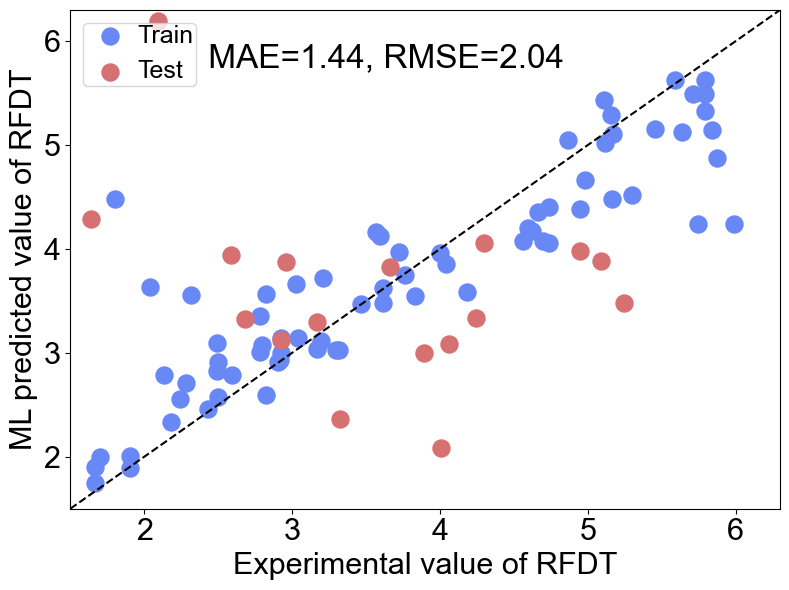

In [36]:
### 绘制预测值与真实值的散点图 ###
fontsize = 22
plt.figure(figsize=(8, 6))

# 绘制训练集的散点图，用 RGB(104, 136, 245) 表示
a = plt.scatter(y_train, y_train_hat, s=150, c=[(104/255, 136/255, 245/255)], label='Train')

# 绘制测试集的散点图，用 RGB(215, 112, 113) 表示
b = plt.scatter(y_test, y_test_hat, s=150, c=[(215/255, 112/255, 113/255)], label='Test')

# 绘制理想的拟合线
plt.plot([1.5, 6.3], [1.5, 6.3], color='k', linestyle='--')

# 设置坐标轴标签
plt.xlabel('Experimental value of RFDT', fontsize=fontsize)
plt.ylabel('ML predicted value of RFDT', fontsize=fontsize)

# 设置标题
# plt.title('Regression performance with optimal parameters', fontsize=14)

# 计算评估指标
r2 = r2_score(y_test, y_test_hat)
mae = mean_absolute_error(y_test, y_test_hat)
rmse = np.sqrt(mean_squared_error(y_test, y_test_hat))

# 在图中添加评估指标
plt.text(2.37, 5.75, f' MAE={mae:.2f}, RMSE={rmse:.2f}', fontsize=24)

# 设置坐标轴范围
plt.xlim([1.5, 6.3])
plt.ylim([1.5, 6.3])

# 添加图例
plt.legend(fontsize=18, handletextpad=0.1, borderpad=0.1)
plt.tick_params(axis='both', which='major', labelsize=fontsize)

# 显示图像
plt.tight_layout()

plt.savefig('mlp_pybel.png', dpi = 1000)
plt.show()

In [37]:
from scipy import stats
print ('r:', stats.pearsonr(y_train, y_train_hat))
print ('r:', stats.pearsonr(y_test, y_test_hat))
print (r2_score(y_test, y_test_hat))

r: (0.8927640117945872, 6.1076789110908e-26)
r: (-0.459430548672462, 0.05509948860807968)
-2.8609396271992718
